# Importar librerías

In [33]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap, TABLEAU_COLORS
import matplotlib as mpl

from itertools import combinations
from sklearn.cluster import KMeans,MeanShift
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn import metrics

import numpy as np
from scipy import linalg
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture

from itertools import cycle, islice
from sklearn.neighbors import kneighbors_graph
from sklearn import cluster
import warnings

# Cargar dataset

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/joaquinvvelaco/diplo-datos-2022/main/ml-nosupervisado/entregable/players_22.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Análisis exploratorio de la base

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 16.1+ MB


In [6]:
df.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [7]:
col_groups = df.columns.to_series().groupby(df.dtypes).groups
group_types = {k.name: v.tolist() for k, v in col_groups.items()}

group_types

{'int64': ['sofifa_id',
  'overall',
  'potential',
  'age',
  'height_cm',
  'weight_kg',
  'nationality_id',
  'weak_foot',
  'skill_moves',
  'international_reputation',
  'attacking_crossing',
  'attacking_finishing',
  'attacking_heading_accuracy',
  'attacking_short_passing',
  'attacking_volleys',
  'skill_dribbling',
  'skill_curve',
  'skill_fk_accuracy',
  'skill_long_passing',
  'skill_ball_control',
  'movement_acceleration',
  'movement_sprint_speed',
  'movement_agility',
  'movement_reactions',
  'movement_balance',
  'power_shot_power',
  'power_jumping',
  'power_stamina',
  'power_strength',
  'power_long_shots',
  'mentality_aggression',
  'mentality_interceptions',
  'mentality_positioning',
  'mentality_vision',
  'mentality_penalties',
  'mentality_composure',
  'defending_marking_awareness',
  'defending_standing_tackle',
  'defending_sliding_tackle',
  'goalkeeping_diving',
  'goalkeeping_handling',
  'goalkeeping_kicking',
  'goalkeeping_positioning',
  'goalke

In [8]:
group_types["float64"]

['value_eur',
 'wage_eur',
 'club_team_id',
 'league_level',
 'club_jersey_number',
 'club_contract_valid_until',
 'nation_team_id',
 'nation_jersey_number',
 'release_clause_eur',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'goalkeeping_speed']

In [9]:
group_types["object"]

['player_url',
 'short_name',
 'long_name',
 'player_positions',
 'dob',
 'club_name',
 'league_name',
 'club_position',
 'club_loaned_from',
 'club_joined',
 'nationality_name',
 'nation_position',
 'preferred_foot',
 'work_rate',
 'body_type',
 'real_face',
 'player_tags',
 'player_traits',
 'ls',
 'st',
 'rs',
 'lw',
 'lf',
 'cf',
 'rf',
 'rw',
 'lam',
 'cam',
 'ram',
 'lm',
 'lcm',
 'cm',
 'rcm',
 'rm',
 'lwb',
 'ldm',
 'cdm',
 'rdm',
 'rwb',
 'lb',
 'lcb',
 'cb',
 'rcb',
 'rb',
 'gk',
 'player_face_url',
 'club_logo_url',
 'club_flag_url',
 'nation_logo_url',
 'nation_flag_url']

In [10]:
positions = ['ls',
 'st',
 'rs',
 'lw',
 'lf',
 'cf',
 'rf',
 'rw',
 'lam',
 'cam',
 'ram',
 'lm',
 'lcm',
 'cm',
 'rcm',
 'rm',
 'lwb',
 'ldm',
 'cdm',
 'rdm',
 'rwb',
 'lb',
 'lcb',
 'cb',
 'rcb',
 'rb',
 'gk']

In [11]:
df_splitted = df.assign(player_positions=df.player_positions.str.split(',')).explode('player_positions').reset_index(drop=True)

In [12]:
df_splitted.player_positions.unique()

array(['RW', ' ST', ' CF', 'ST', ' LW', 'LW', ' CAM', 'CM', 'GK', 'CDM',
       ' CM', 'CF', 'LM', 'CB', ' RB', ' RW', 'CAM', ' RM', ' LM', ' CDM',
       'LB', ' CB', 'RB', 'RM', ' LB', ' RWB', ' LWB', 'LWB', 'RWB'],
      dtype=object)

In [13]:
df[df["club_position"]=="RWB"][df["club_name"]=="Manchester City"][["long_name", "club_position", "nation_position", "player_positions"]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,long_name,club_position,nation_position,player_positions


In [14]:
df[df["club_position"]=="RWB"][["long_name", "club_position", "nation_position", "player_positions"]]

,long_name,club_position,nation_position,player_positions
148,César Azpilicueta Tanco,RWB,SUB,"CB, RWB"
478,Nélson Cabral Semedo,RWB,SUB,"RWB, RB"
505,Pedro Antonio Porro Sauceda,RWB,NaN,"RWB, RM"
905,Christopher Trimmel,RWB,SUB,"RWB, RM, RB"
954,Joël Ivo Veltman,RWB,NaN,"CB, RB, RWB"
...,...,...,...,...
16764,Jay Henderson,RWB,NaN,"RWB, LWB"
17044,Mohammed Rafique,RWB,NaN,"RB, RM"
17111,Thomas Edward Pugh,RWB,NaN,CM
18198,迪力穆拉提·毛拉尼牙孜,RWB,NaN,"RB, RM"


In [15]:
numerical_cols = group_types["float64"] + group_types["int64"]

In [16]:
score_cols = ['attacking_crossing',
  'attacking_finishing',
  'attacking_heading_accuracy',
  'attacking_short_passing',
  'attacking_volleys',
  'skill_dribbling',
  'skill_curve',
  'skill_fk_accuracy',
  'skill_long_passing',
  'skill_ball_control',
  'movement_acceleration',
  'movement_sprint_speed',
  'movement_agility',
  'movement_reactions',
  'movement_balance',
  'power_shot_power',
  'power_jumping',
  'power_stamina',
  'power_strength',
  'power_long_shots',
  'mentality_aggression',
  'mentality_interceptions',
  'mentality_positioning',
  'mentality_vision',
  'mentality_penalties',
  'mentality_composure',
  'defending_marking_awareness',
  'defending_standing_tackle',
  'defending_sliding_tackle',
  'goalkeeping_diving',
  'goalkeeping_handling',
  'goalkeeping_kicking',
  'goalkeeping_positioning',
  'goalkeeping_reflexes']

In [17]:
for col in score_cols:
    print(f"{col} - Mínimo: {df[col].min()} Máximo {df[col].max()}")

attacking_crossing - Mínimo: 6 Máximo 94
attacking_finishing - Mínimo: 2 Máximo 95
attacking_heading_accuracy - Mínimo: 5 Máximo 93
attacking_short_passing - Mínimo: 7 Máximo 94
attacking_volleys - Mínimo: 3 Máximo 90
skill_dribbling - Mínimo: 4 Máximo 96
skill_curve - Mínimo: 6 Máximo 94
skill_fk_accuracy - Mínimo: 4 Máximo 94
skill_long_passing - Mínimo: 9 Máximo 93
skill_ball_control - Mínimo: 8 Máximo 96
movement_acceleration - Mínimo: 14 Máximo 97
movement_sprint_speed - Mínimo: 15 Máximo 97
movement_agility - Mínimo: 18 Máximo 96
movement_reactions - Mínimo: 25 Máximo 94
movement_balance - Mínimo: 15 Máximo 96
power_shot_power - Mínimo: 20 Máximo 95
power_jumping - Mínimo: 22 Máximo 95
power_stamina - Mínimo: 12 Máximo 97
power_strength - Mínimo: 19 Máximo 97
power_long_shots - Mínimo: 4 Máximo 94
mentality_aggression - Mínimo: 10 Máximo 95
mentality_interceptions - Mínimo: 3 Máximo 91
mentality_positioning - Mínimo: 2 Máximo 96
mentality_vision - Mínimo: 10 Máximo 95
mentality_p

In [18]:
df["club_position"].unique()

array(['RW', 'ST', 'LW', 'RCM', 'GK', 'CF', 'CDM', 'LCB', 'RDM', 'RS',
       'LCM', 'SUB', 'CAM', 'RCB', 'LDM', 'LB', 'RB', 'LM', 'RM', 'LS',
       'CB', 'RES', nan, 'RWB', 'RF', 'CM', 'LWB', 'LAM', 'LF', 'RAM'],
      dtype=object)

In [19]:
df["is_gk"] = df["club_position"] == 'GK'

# Diagramas de dispersión

In [20]:
group_types["float64"]+["is_gk"]

['value_eur',
 'wage_eur',
 'club_team_id',
 'league_level',
 'club_jersey_number',
 'club_contract_valid_until',
 'nation_team_id',
 'nation_jersey_number',
 'release_clause_eur',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'goalkeeping_speed',
 'is_gk']

Separamos las variables numéricas en grupos para graficarlas

In [21]:
groups_score = [['attacking', 'skill'],
                 ['movement', 'power', 'defending'], 
                 ['mentality','goalkeeping']]

gs_flat = [item for sublist in groups_score for item in sublist]

cols_score = [[x for x in numerical_cols if x.rsplit('_')[0] in g and '_' in x] 
              for g in groups_score]

cols_other = [x for x in numerical_cols
              if x.rsplit('_')[0] not in gs_flat or '_' not in x]

cols_other = [cols_other[r-10:r] for r in [10, 20]]

groups_cols = cols_other + cols_score
groups_cols

[['value_eur',
  'wage_eur',
  'club_team_id',
  'league_level',
  'club_jersey_number',
  'club_contract_valid_until',
  'nation_team_id',
  'nation_jersey_number',
  'release_clause_eur',
  'pace'],
 ['shooting',
  'passing',
  'dribbling',
  'defending',
  'physic',
  'sofifa_id',
  'overall',
  'potential',
  'age',
  'height_cm'],
 ['skill_moves',
  'attacking_crossing',
  'attacking_finishing',
  'attacking_heading_accuracy',
  'attacking_short_passing',
  'attacking_volleys',
  'skill_dribbling',
  'skill_curve',
  'skill_fk_accuracy',
  'skill_long_passing',
  'skill_ball_control'],
 ['movement_acceleration',
  'movement_sprint_speed',
  'movement_agility',
  'movement_reactions',
  'movement_balance',
  'power_shot_power',
  'power_jumping',
  'power_stamina',
  'power_strength',
  'power_long_shots',
  'defending_marking_awareness',
  'defending_standing_tackle',
  'defending_sliding_tackle'],
 ['goalkeeping_speed',
  'mentality_aggression',
  'mentality_interceptions',
  'me

Mapeamos las posiciones en cuatro clases diferenciadas (según lo visto en clases):

In [22]:
# Clasificación de las posiciones
classes = {
    'Forward': ['RF', 'ST', 'LW', 'LF', 'RS', 'LS', 'RM', 'LM','RW'],
    'Midfielder': ['RCM','LCM','LDM','CAM','CDM','LAM','RDM','CM','RAM','CF'],
    'Defender': ['RCB','CB','LCB','LB','RB','RWB','LWB'],
    'GK': ['GK']
}
# Invertimos la clasificación en una lista de diccionarios de {posición : clase}
classes_inverted = [{x:k} for k, v in classes.items() for x in v]
# Comprimimos la lista en un diccionario de {posición: clase}
class_mapping = {k: v for d in classes_inverted for k, v in d.items()}
# Creamos un nuevo campo que sea la clase en base a la posición en club de origen
df['position'] = df['club_position'].map(class_mapping)
df['position'].head()

0       Forward
1       Forward
2       Forward
3       Forward
4    Midfielder
Name: position, dtype: object

In [ ]:
for col_group in groups_cols:
  sns.pairplot(df[col_group + ['position']], hue='position')

In [24]:
correlations = df[numerical_cols].corr()

In [25]:
class Correlation:
    def __init__(self, name_var_1, name_var_2, correlation):
        self.name_var_1 = name_var_1
        self.name_var_2 = name_var_2
        self.correlation = correlation

    def is_very_high(self):
        return abs(self.correlation) >= 0.8
    
    def is_high(self):
        return 0.8 > abs(self.correlation) >= 0.6

    def print(self):
        print(f"Las variables {self.name_var_1} y {self.name_var_2} tienen una correlación de {self.correlation}")

In [26]:
combinations_columns = list(combinations(numerical_cols, r=2))

In [27]:
combinations_columns

[('value_eur', 'wage_eur'),
 ('value_eur', 'club_team_id'),
 ('value_eur', 'league_level'),
 ('value_eur', 'club_jersey_number'),
 ('value_eur', 'club_contract_valid_until'),
 ('value_eur', 'nation_team_id'),
 ('value_eur', 'nation_jersey_number'),
 ('value_eur', 'release_clause_eur'),
 ('value_eur', 'pace'),
 ('value_eur', 'shooting'),
 ('value_eur', 'passing'),
 ('value_eur', 'dribbling'),
 ('value_eur', 'defending'),
 ('value_eur', 'physic'),
 ('value_eur', 'goalkeeping_speed'),
 ('value_eur', 'sofifa_id'),
 ('value_eur', 'overall'),
 ('value_eur', 'potential'),
 ('value_eur', 'age'),
 ('value_eur', 'height_cm'),
 ('value_eur', 'weight_kg'),
 ('value_eur', 'nationality_id'),
 ('value_eur', 'weak_foot'),
 ('value_eur', 'skill_moves'),
 ('value_eur', 'international_reputation'),
 ('value_eur', 'attacking_crossing'),
 ('value_eur', 'attacking_finishing'),
 ('value_eur', 'attacking_heading_accuracy'),
 ('value_eur', 'attacking_short_passing'),
 ('value_eur', 'attacking_volleys'),
 ('val

In [28]:

high_correlations = []

for pair in combinations_columns:
    if(pair[0] != pair[1]):
        correlation = Correlation(pair[0], pair[1], correlations[pair[0]][pair[1]])
        if(correlation.is_very_high()):
            high_correlations.append(correlation)

# Preprocesamiento

## Imputación de valores faltantes

In [29]:
knn_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
df[numerical_cols] = knn_imputer.fit_transform(df[numerical_cols])

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


## Estandarización de variables numéricas

Escalamos los datos. Aplicaremos KMeans sobre las columnas score_cols, que como vimos anteriormente no tienen exactamente el mismo rango. 

In [30]:
scaler = MinMaxScaler()

standarized_df = df.copy()

standarized_df[numerical_cols] = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), columns=df[numerical_cols].columns)


# Clustering

## K-Means

In [ ]:
# Número de clusters buscado
n_clust = 5

km = KMeans(n_clusters=n_clust, random_state=565)
km.fit(standarized_df[score_cols])

# Etiquetas asignadas por el algoritmo
standarized_df["km_cluster"] = km.labels_


In [ ]:
standarized_df["club_name"]

0        Paris Saint-Germain
1          FC Bayern München
2          Manchester United
3        Paris Saint-Germain
4            Manchester City
                ...         
19234               Wuhan FC
19235             Derry City
19236             Finn Harps
19237             Finn Harps
19238    NorthEast United FC
Name: club_name, Length: 19239, dtype: object

In [ ]:
standarized_df[standarized_df["club_name"] == "FC Bayern München"][["short_name", "km_cluster"]]

,short_name,km_cluster
1,R. Lewandowski,3
7,M. Neuer,1
19,J. Kimmich,4
35,T. Müller,3
40,L. Goretzka,4
64,K. Coman,3
89,S. Gnabry,3
116,M. Sabitzer,4
132,L. Sané,3
181,L. Hernández,4


Según un análisis superficial de equipos como FC Bayern München, Paris Saint-Germain, Manchester United, Manchester City y Boca Juniors, al parecer los agrupamientos son los siguientes 

0. Defensores
1. Arqueros
2. Mediocampista ofensivo / Delantero 
3. Mediocampista ofensivo / Delantero 
4. Mediocampista / Lateral

La diferencia entre el 2 y el 3 pasa por la calidad del jugador, siendo los 2, jugadores de baja calidad. Podríamos considerar a los mismos con un overall<0.5

La hipótesis es cierta en el 80% de los jugadores

In [ ]:
def contains(a, b):
    for i in a:
        if (i in b):
            return True
    return False

In [ ]:
goalkeeper = ["GK"]
backs = ["CB"]
lateral_backs = ["LB","RB","RWB","LWB"]
offensive_midfielders = ["CF","CAM","LM","RM"]
midfielders = ["CDM", "CM"]
forwards = ["RW","ST","LW"]

BACK = 0
GOALKEEPER = 1
BAD_OFFENSIVE_MIDFIELDER_FORWARD = 2
OFFENSIVE_MIDFIELDER_FORWARD = 3
MIDFIELDER_LATERAL_BACK = 4


def is_expected_group(player_positions, overall, group):
    player_positions = player_positions.replace(" ", "").split(",")

    if (contains(player_positions, goalkeeper) & (group == GOALKEEPER)):
        return 1

    if (contains(player_positions, backs) & (group == BACK)):
        return 1

    if (contains(player_positions, lateral_backs+midfielders)  & (group == MIDFIELDER_LATERAL_BACK)):
        return 1
    
    if (contains(player_positions, offensive_midfielders+forwards)):
        if ((overall<0.5) & (group == BAD_OFFENSIVE_MIDFIELDER_FORWARD)):
            return 1
        if ((overall>=0.5) & (group == OFFENSIVE_MIDFIELDER_FORWARD)):
            return 1
            
    return 0

        

In [ ]:
standarized_df["is_expected_group"] = standarized_df.apply(lambda player: is_expected_group(player["player_positions"], 
    player['overall'], 
    player["km_cluster"]), axis=1)

standarized_df["is_expected_group"].sum()/len(standarized_df)

0.8036800249493217

## Gaussian Mixture Models (GMM)

Seleccionamos los parámetros mediante BIC. Este criterio nos sirve para seleccionar el número de componentes en forma eficiente.

In [ ]:
X = standarized_df[numerical_cols]

# Seleccionamos columnas de interés

columns_interest = ['mentality_positioning', 'goalkeeping_reflexes']

X = X.loc[:, columns_interest]

print(X.shape)


(19239, 2)


Definimos los parámetros sobre los que vamos a iterar

In [ ]:
n_components_range = range(1, 7)  # Rango de número de componentes
cv_types = ['spherical', 'tied', 'diag', 'full']  # Tipos de covarianza

Funciones a utilizar

In [ ]:
def get_best_params(X, n_components_range, covariance_types, reverse=False,
                    estimator=GaussianMixture, lowest_score=np.inf, 
                    random_state=565):
  """Función que obtiene los mejores parámetros para un estimador del tipo 
  Gaussian Mixture.
  """
  _lowest_score = lowest_score
  score = []  
  for cv_type in covariance_types:
    n_comps = reversed(n_components_range) if reverse else n_components_range
    for n_components in n_comps:
        # Fit a Gaussian mixture with EM
        gmm = estimator(n_components=n_components,
                        covariance_type=cv_type, random_state=random_state)
        gmm.fit(X)
        try:
          score.append(gmm.bic(X))
        except:  # Case: when it's a Dirichlet Process GMM 
          score.append(abs(gmm.score(X)))
        
        if score[-1] < _lowest_score:
          _lowest_score = score[-1]
          best_gmm = gmm
  
  return np.array(score), best_gmm


def plot_bic_scores(covariance_types, n_components_range, bic,
                    fig_size=(12, 6), color_palette=TABLEAU_COLORS):
  bars = []

  plt.figure(figsize=fig_size)
  
  for i, (cv_type, color) in enumerate(zip(covariance_types, color_palette)):
      xpos = np.array(n_components_range) + .2 * (i - 2)
      ypos = bic[i * len(n_components_range):(i + 1) * len(n_components_range)]
      bars.append(plt.bar(xpos, ypos, width=.2, color=color, alpha=0.5))
  
  plt.xticks(n_components_range)
  plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
  plt.title('BIC score por modelo')
  xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
      .2 * np.floor(bic.argmin() / len(n_components_range))
  plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
  plt.xlabel('Número de componentes')
  plt.legend([b[0] for b in bars], covariance_types,
             bbox_to_anchor=(1.05, 1.0), loc='upper left')


def plot_ellipse(n, model, color, subplot, n_sigma=1):
  cov_type = model.covariance_type
  if cov_type == "full":
    covariances = model.covariances_[n][:2, :2]
  elif cov_type == "tied":
    covariances = model.covariances_[:2, :2]
  elif cov_type == "diag":
    covariances = np.diag(model.covariances_[n][:2])
  elif cov_type == "spherical":
    covariances = np.eye(model.means_.shape[1]) * model.covariances_[n]

  v, w = linalg.eigh(covariances)
  v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
  u = w[0] / linalg.norm(w[0])

  angle = np.arctan(u[1] / u[0])
  angle = 180. * (angle / np.pi + 1.) # convert to degrees & rotate 180

  mean = model.means_[n, :2]

  ell = mpl.patches.Ellipse(mean, n_sigma*v[0], n_sigma*v[1], angle, color=color)
  ell.set_clip_box(subplot.bbox)
  ell.set_alpha(.5)
  subplot.add_artist(ell)
  return ell
  #subplot.set_aspect("equal", "datalim")


def plot_results(X, model, estimator,
                 fig_size=(12,12),color_palette=TABLEAU_COLORS):
  plt.figure(figsize=fig_size)
  splot = plt.subplot(2, 1, 2)
  Y_ = model.predict(X)
  covariance_type = model.covariance_type

  ellipses = []

  for i, (_, color) in enumerate(zip(Y_, color_palette)):
    if not np.any(Y_ == i):
        continue
    sns.scatterplot(X.iloc[Y_ == i, 0], X.iloc[Y_ == i, 1], .8, color=color)

    ellipses.append(plot_ellipse(i, model, color, splot, n_sigma=1))

  plt.xticks(())
  plt.yticks(())
  plt.xlabel(X.columns[0].replace('_', ' '))
  plt.ylabel(X.columns[1].replace('_', ' '))
  title = f"{estimator} Seleccionado: {model.n_components} componentes"
  title += f" y {model.covariance_type} covariance"
  plt.title(title)
  plt.subplots_adjust(hspace=.35, bottom=.02)
  plt.legend(ellipses, list(set(Y_)))
  #plt.savefig('gaussian_mixture3', dpi=300)
  plt.show() 

Calculamos los mejores parámetros de la GMM. Guardamos los puntajes BIC para luego graficarlos.

In [ ]:
bic_scores, clf =  get_best_params(X, n_components_range, cv_types)

In [ ]:
clf.n_features_in_

2

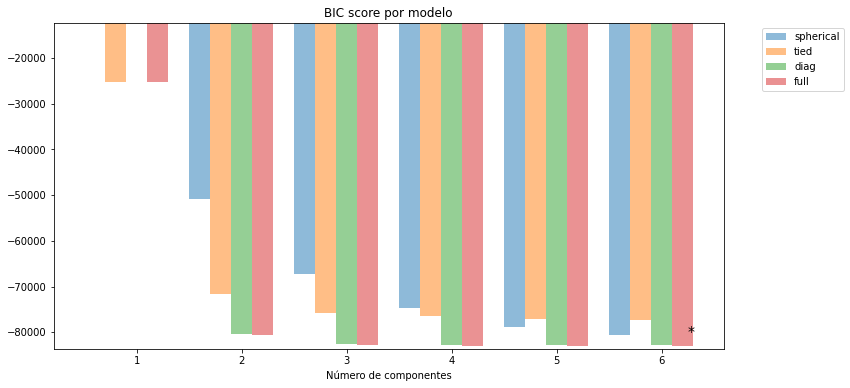

In [ ]:
plot_bic_scores(cv_types, n_components_range, bic_scores)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3

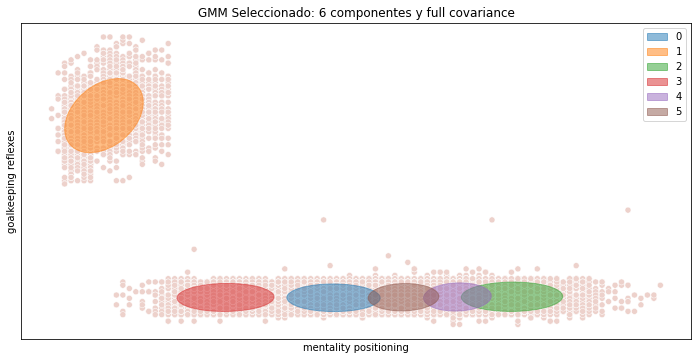

In [ ]:
plot_results(X, clf, estimator='GMM')

Probamos con Dirichlet Process GMM a ver si cambian los resultados. Utilizamos el dataset sin estandarizar.

/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282:

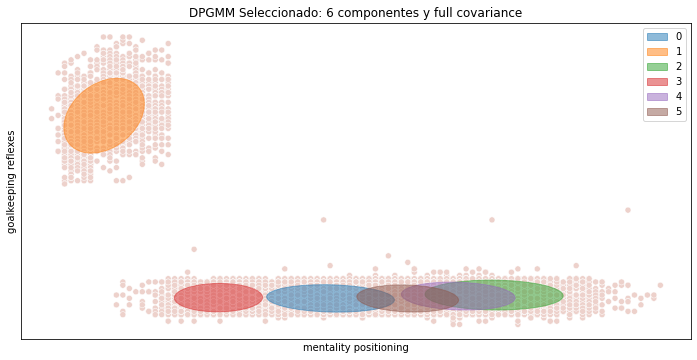

In [ ]:
X = df[numerical_cols].loc[:, columns_interest]
scores, clf =  get_best_params(X, n_components_range, cv_types, estimator=BayesianGaussianMixture, reverse=True)

plot_results(X, clf, estimator='DPGMM')

## DBSCAN  (Density-Based Spatial Clustering of Applications with Noise) 

In [ ]:
arr = standarized_dfX = standarized_df[numerical_cols].to_numpy()

Estandarizamos:

In [ ]:
X = StandardScaler().fit_transform(arr)

Realizamos un gráfico de vecinos más cercanos para tener una proximación a la hora de seleccionar el parámetro EPS, uno de los que debemos setear para DBSCAN:

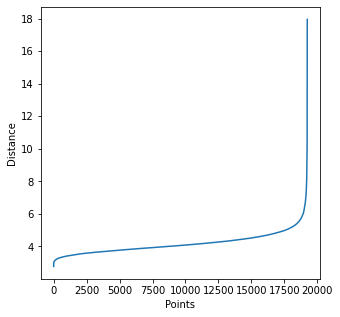

In [ ]:
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(X)
distances, indices = neighbors.kneighbors(X)
distances = np.sort(distances[:,10], axis=0)
fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.savefig("Distance_curve.png", dpi=300)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Estimated number of clusters: 2
Estimated number of noise points: 53
Silhouette Coefficient: 0.412


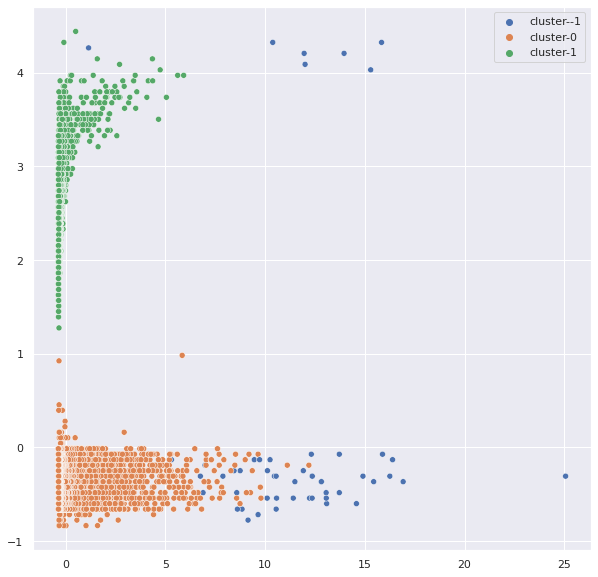

In [ ]:
db = DBSCAN(eps=8, min_samples=100).fit(X)
labels = db.labels_

fig = plt.figure(figsize=(10, 10))
sns.scatterplot(X[:,8], X[:,-2], hue=["cluster-{}".format(x) for x in labels])
plt.savefig("dbscan_with_knee.png", dpi=300)
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

En el gráfico anterior podemos observar los dos clusters (en naranja y verde) que el algoritmo encontró, que interpretamos que pueden ser los arqueros separados del resto de los jugadores. En azul podemos ver los puntos clasificados como ruidosos. El valor obtenido para el coeficiente de Silhouette es 0.41.

## Jerarquicos  (Complete Linkage)

Estandarización y selección


In [31]:
#Estandarización 

X = standarized_df[numerical_cols]

# Seleccionamos columnas de interés

columns_interest = ['mentality_positioning', 'goalkeeping_reflexes']

X = X.loc[:, columns_interest]

print(X.shape)

(19239, 2)


Creación de clusters


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_agglomerative.py:281: UserWarning: the number of connected components of the connectivity matrix is 403 > 1. Completing it to avoid stopping the tree early.
  X, connectivity, affinity="euclidean"
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


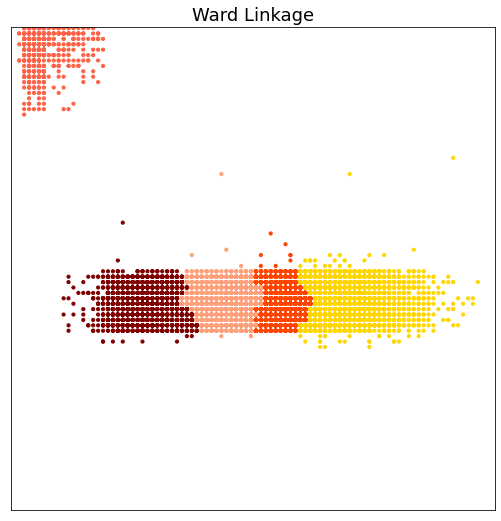

Silhouette Coefficient: 0.433
Davies Bouldin Score: 0.656


In [35]:
# Set up cluster parameters
plt.figure(figsize=(7, 7))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'n_neighbors': 15,
                'n_clusters': 5}
    
params = default_base.copy()

# normalize dataset for easier parameter selection
X = StandardScaler().fit_transform(X)
# connectivity matrix for structured Ward
connectivity = kneighbors_graph(
    X, n_neighbors=params['n_neighbors'], include_self=False)
# make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)
  
# ============
# Create cluster objects
# ============

ward = cluster.AgglomerativeClustering(
    n_clusters=params['n_clusters'], linkage='ward',connectivity=connectivity)

clustering_algorithms = (
    ('Ward Linkage', ward),
)  

for name, algorithm in clustering_algorithms:

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning
            )
            algorithm.fit(X)

        cluster_labels = algorithm.labels_

        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(1, len(clustering_algorithms), plot_num)
        
        plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['gold', 'tomato', 'maroon',
                                             'lightsalmon', 'orangered', 'firebrick',
                                             'rosybrown', 'mistyrose', 'peachpuff']),
                                      int(max(y_pred) + 1))))
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plot_num += 1


plt.show()


print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, cluster_labels))
print("Davies Bouldin Score: %0.3f" %metrics.davies_bouldin_score(X, cluster_labels))


En el grafico anterior se puede ver claramente un cluster separando que asumimos corresponde a los arquieros. Los resultados obtenidos para Davies Bouldin y Silhouette fueron 0.65 y 0.43 respectivamente. Se decide utilizar Ward Linkage ya que se obtenia una division mas clara de los cluster

# Embedding

## PCA

In [ ]:
pca = PCA(n_components=4)
pca.fit(standarized_df[group_types["int64"]])

PCA(n_components=4)

In [ ]:
pca.explained_variance_ratio_

array([0.50478751, 0.15501876, 0.07674224, 0.04543943])

In [ ]:
pca.transform(standarized_df[group_types["int64"]])

array([[-1.62694087, -1.17317531,  0.92978873, -0.3081891 ],
       [-1.50929855, -0.77015955,  1.09053665,  0.25812092],
       [-1.55695353, -1.028921  ,  1.19710895,  0.20548664],
       ...,
       [ 0.38345631,  0.0629963 , -0.59308545,  0.11828648],
       [ 0.61947856, -0.67182568, -0.73910268,  0.13120748],
       [ 0.36550526, -0.14900573, -0.80728102, -0.16554415]])

In [ ]:
pca_df = pd.DataFrame(data = pca.transform(standarized_df[group_types["int64"]]), columns=["pc1", "pc2", "pc3", "pc4"])

In [ ]:
standarized_df["pc1"] = pca_df["pc1"]
standarized_df["pc2"] = pca_df["pc2"]
standarized_df["pc3"] = pca_df["pc3"]
standarized_df["pc4"] = pca_df["pc4"]

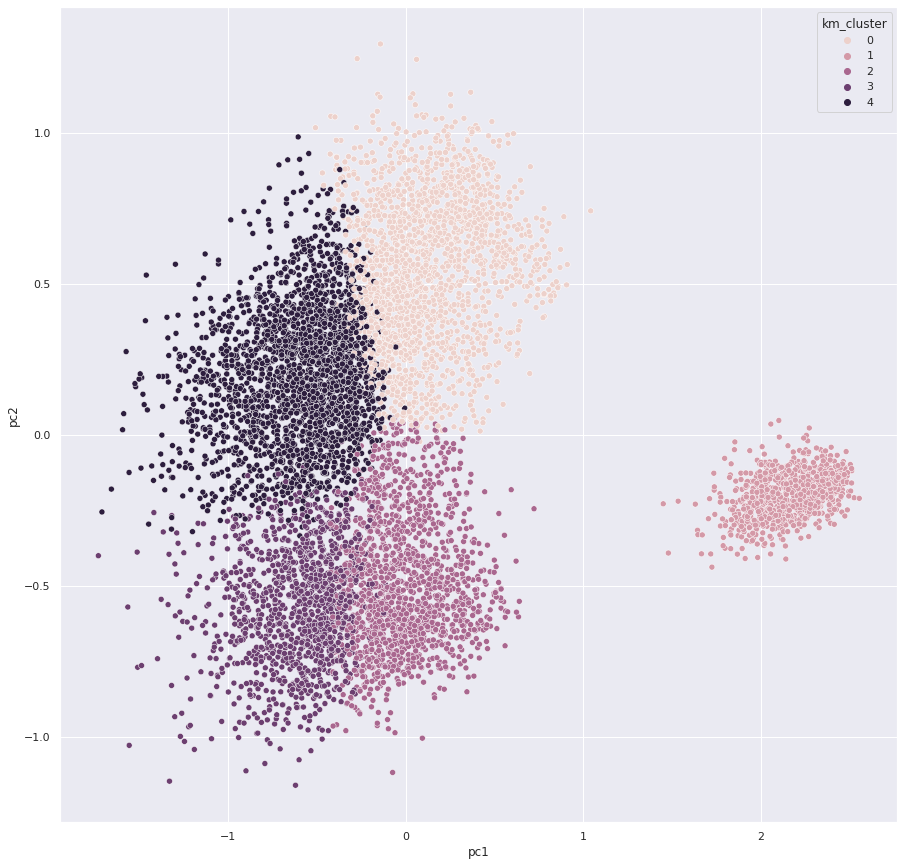

In [ ]:

sns.set(rc={'figure.figsize':(15,15)})
sns.scatterplot(data=standarized_df.sample(8000), x="pc1", y="pc2", hue="km_cluster")

Si bien las dos componentes principales conservan aproximadamente solo el 65% de la información, es suficiente para visualizar en el plano la separación entre ambos grupos.
Se observa que la PC1 se encuentra significativamente relacionada a la capacidad que tiene el jugador para atajar (altos valores en los scores que comienzan con "goalkeeping_") 